## Well basics

Some preliminaries...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import welly
welly.__version__

'0.1.0'

In [2]:
import os
env = %env

## Load a well from LAS

Use the `from_las()` method to load a well by passing a filename as a `str`. 

This is really just a wrapper for `lasio` but instantiates a `Header`, `Curve`s, etc.

In [3]:
from welly import Well

In [4]:
w = Well.from_las('P-129_out.LAS')

In [31]:
w

In [19]:
len(w.data)

25

In [22]:
dir(w)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_plot_depth_track',
 '_repr_html_',
 'add_curves_from_las',
 'add_curves_from_lasio',
 'data',
 'from_las',
 'from_lasio',
 'header',
 'las',
 'location',
 'plot',
 'survey_basis',
 'to_las',
 'to_lasio',
 'uwi']

In [23]:
w.uwi

"Long = 63* 45'24.460  W"

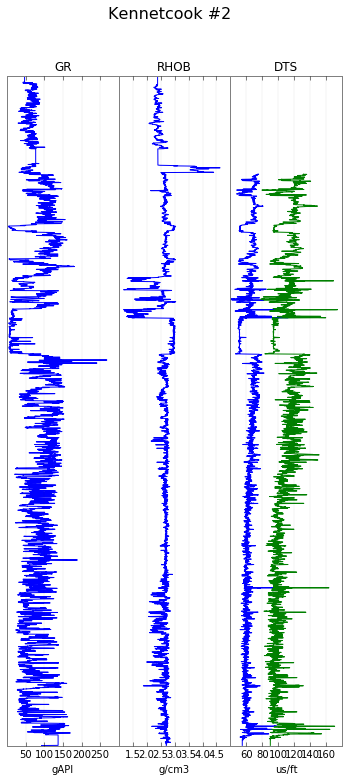

In [5]:
tracks = ['GR', 'RHOB', ['DT', 'DTS']]
w.plot(tracks=tracks)

## Add a striplog

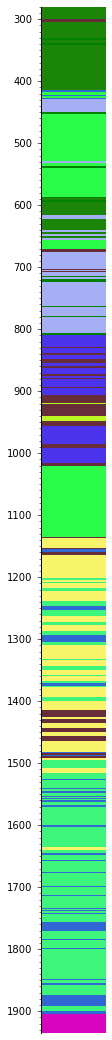

In [6]:
from striplog import Legend, Striplog
legend = Legend.builtin('NSDOE')
strip = Striplog.from_image('P-129_280_1935.png', 280, 1935, legend=legend)
strip.plot()

In [7]:
w.data['strip'] = strip

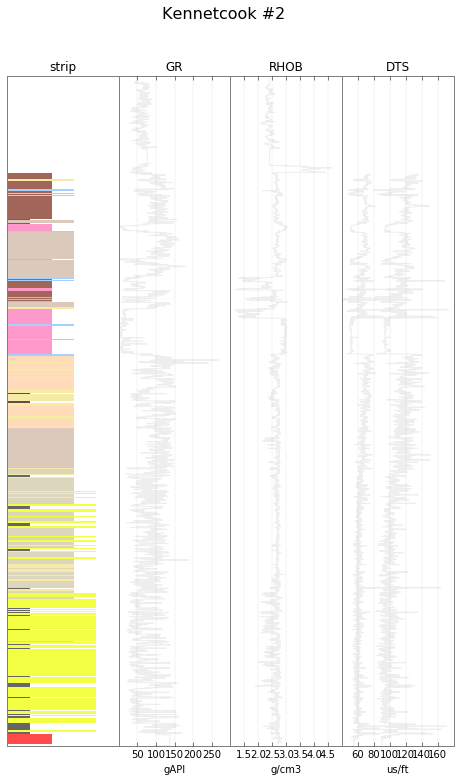

In [13]:
tracks = ['strip', 'GR', 'RHOB', ['DT', 'DTS']]
w.plot(tracks=tracks, legend=legend)

In [9]:
curve_legend_csv = """colour,lw,xscale,curve mnemonic
#ff0000,2.0,linear,GR
#000000,2.0,log,RHOB
#00ff00,2.0,linear,DT
#ffff00,3.0,linear,DTS
"""
curve_legend = Legend.from_csv(curve_legend_csv)
curve_legend

Legend(Decor({'xscale': 'linear', 'lw': 2.0, 'width': None, 'hatch': None, 'colour': '#ff0000', 'curve': Component({'mnemonic': 'gr'})})
Decor({'xscale': 'log', 'lw': 2.0, 'width': None, 'hatch': None, 'colour': '#000000', 'curve': Component({'mnemonic': 'rhob'})})
Decor({'xscale': 'linear', 'lw': 2.0, 'width': None, 'hatch': None, 'colour': '#00ff00', 'curve': Component({'mnemonic': 'dt'})})
Decor({'xscale': 'linear', 'lw': 3.0, 'width': None, 'hatch': None, 'colour': '#ffff00', 'curve': Component({'mnemonic': 'dts'})}))

In [10]:
complete_legend = legend + curve_legend

In [11]:
complete_legend.get_decor(w.data['GR'])

xscale,linear
lw,2.0
width,None
hatch,None
colour,#ff0000
curve,{'mnemonic': 'gr'}


/Users/matt/anaconda/envs/python3/lib/python3.4/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


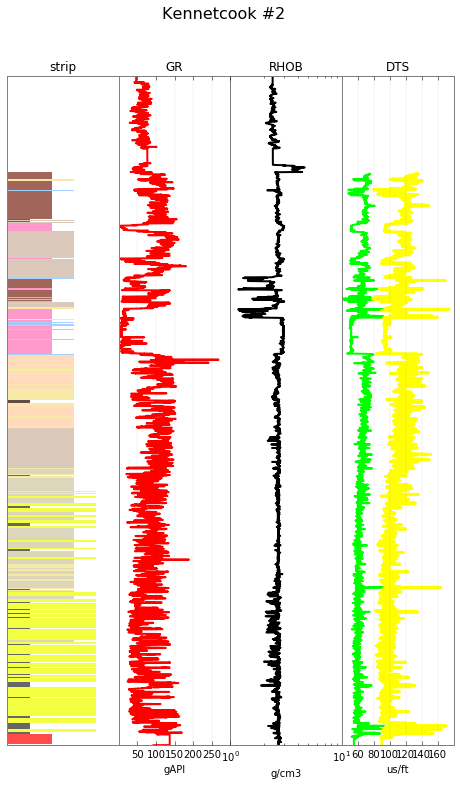

In [12]:
w.plot(tracks=tracks, legend=complete_legend)

## Load another well

In [17]:
canstrat = 'Dropbox/Agile/Canstrat/Sample_LAS_from_Canstrat/EC00001_CS/'
x = Well.from_las(os.path.join(env['HOME'], canstrat, 'EC00001_CS_main.LAS'))

In [18]:
x.header

{'uwi': inf, 'name': 'SHELL ONONDAGA E-84', 'company': 'Operator'}

In [19]:
x

## Add data

In [20]:
len(x.data)

23

In [21]:
fname = '/Users/matt/Dropbox/Agile/Canstrat/Sample_LAS_from_Canstrat/EC00001_CS/EC00001_CS_diagen_ind.LAS'
x.add_curves_from_las(fname)

In [22]:
len(x.data)

34

## Header

Maybe should be called 'meta' as it's not really a header... 

In [25]:
w.header

{'field': 'Windsor Block', 'license': 'P-129', 'company': 'Elmworth Energy Corporation', 'uwi': "Long = 63* 45'24.460  W", 'name': 'Kennetcook #2'}

In [26]:
w.header.name

'Kennetcook #2'

In [27]:
w.uwi  # Fails because not present in this file. See one way to add it in a minute.

"Long = 63* 45'24.460  W"

## Location and CRS

In [28]:
w.location

Location({'crs': CRS({}), 'province': 'Nova Scotia', 'country': 'CA', 'gl': 90.3, 'section': '45.20 Deg N', 'td': 1935.0, 'position': None, 'tdl': 1935.0, 'kb': 94.8, 'deviation': None, 'location': 'Lat = 45* 12\' 34.237" N', 'range': 'PD 176', 'tdd': 1935.0, 'township': '63.75 Deg W'})

In [29]:
w.location.crs

CRS({})

In [30]:
from welly import CRS
w.location.crs = CRS.from_epsg(2038)

In [24]:
w.location.position

## Add deviation data to a well

In [25]:
p = Well.from_las('P-130_out.LAS')

In [26]:
dev = np.loadtxt('P-130_deviation_survey.csv', delimiter=',', skiprows=1)

In [30]:
dev.shape

(163, 4)

In [27]:
p.location.add_deviation(dev[:, :3], td=2618.3)

In [29]:
p.location.position.shape

(165, 3)

## Curves

Just a list of objects.

In [7]:
w.data  # Just a dict of data objects.

{'CALI': Curve([ 2.44381547,  2.44381547,  2.44381547, ...,  2.42026806,
         2.42026806,  2.42026806]),
 'DEPT': Curve([  1.06680000e+00,   1.21920000e+00,   1.37160000e+00, ...,
          1.93883280e+03,   1.93898520e+03,   1.93913760e+03]),
 'DPHI_DOL': Curve([  2.59099990e-01,   2.59099990e-01,   2.59099990e-01, ...,
          5.41675720e+02,   5.41675720e+02,   5.41675720e+02]),
 'DPHI_LIM': Curve([  1.98440000e-01,   1.98440000e-01,   1.98440000e-01, ...,
          5.85941528e+02,   5.85941528e+02,   5.85941528e+02]),
 'DPHI_SAN': Curve([ 0.15748   ,  0.15748   ,  0.15748   , ...,  0.54641998,
         0.54641998,  0.54641998]),
 'DRHO': Curve([ 0.19423294,  0.19423294,  0.19423294, ...,  0.06139515,
         0.06139515,  0.06139515]),
 'DT': Curve([ nan,  nan,  nan, ...,  nan,  nan,  nan]),
 'DTS': Curve([ nan,  nan,  nan, ...,  nan,  nan,  nan]),
 'GR': Curve([ 46.69865036,  46.69865036,  46.69865036, ...,  92.24622345,
         92.24622345,  92.24622345]),
 'HCAL': Curve([

In [1]:
from welly import Curve

In [11]:
p = {'mnemonic': 'FOO', 'run':0, }
data = [20, 30, 40, 20, 10, 0, 10]
c = Curve(data, [2,3,4,5,6,7,8], p)

In [12]:
c.run

0

In Jupyter Notebook, the `__repr__()` is a little table summarizing the curve data...

In [11]:
gr = w.data['GR']
gr

Curve([ 46.69865036,  46.69865036,  46.69865036, ...,  92.24622345,
        92.24622345,  92.24622345])

`Curve` objects are just `ndarray`s, so we get lots of things for free...

In [12]:
m = np.mean(gr)

In [13]:
m  # Not really sure why this is a Curve

Curve(78.9863535887685)

In [46]:
gr.mnemonic

'GR'

## Using Legend

In [47]:
legend_csv = """curve mnemonic,track,xleft,xright,xticks,xlabel_fmt,midline,logarithmic,linecolor,colour,fill_left_cond,fill_left,fill_right_color
GR,0,0,210,"30,60,90,120,150,180",int,,linear,black,g,xleft,#FFFFFF,
CALI,0,4,14,"4,14",,,linear,light grey,#D3D3D3,,,
PEF,0,0,20,"0,10,20",,,linear,plum,#EAADEA,,,
SP,0,0,100,"25,50,75",,,linear,sap green,#308014,,,
RLA5,1,0.02,2000,"0.2,2.0,20,200",,,log,black,#000000,,,#F3F3F3
RLA4,1,0.02,2000,"0.2,2.0,20,200",,,log,black,#000000,,,#F3F3F3"""

In [48]:
from striplog import Legend
l = Legend.from_csv(legend_csv)

In [49]:
l.get_decor(gr)

track,0.0
xright,210.0
fill_left,#ffffff
xticks,"30,60,90,120,150,180"
colour,#00ff00
hatch,None
midline,
xlabel_fmt,int
logarithmic,linear
xleft,0.0
fill_left_cond,xleft


## Units

`welly` does not deal in a smart way with units. 

We recommend `pint` for now. At some point we may intergate its behaviour into `welly`. 

In [50]:
w.data['RHOB']

Curve([ 2.39014983,  2.39014983,  2.39014983, ...,         nan,
               nan,         nan])

In [51]:
import pint
ureg = pint.UnitRegistry()

rhob_old = ureg.Quantity(w.data['RHOB'], 'g/cm^3')
rhob_new = rhob_old.to('kg/m^3')

print(rhob_new)

[ 2390.1498318  2390.1498318  2390.1498318 ...,           nan           nan           nan] kilogram / meter ** 3


In [52]:
rhob_new.units

<Unit('kilogram / meter ** 3')>

## Plotting and reading

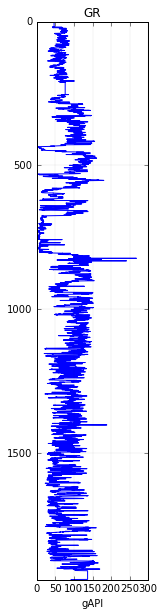

In [11]:
gr.plot(lw=0.5)

In [54]:
gr.read_at(1001)

97.991123408843123

In [55]:
gr.read_at([1001, 1003, 1004])

array([  97.99112341,  116.8162655 ,  104.1488654 ])

In [56]:
gr.stop

1939.2900000000002

## Changing basis

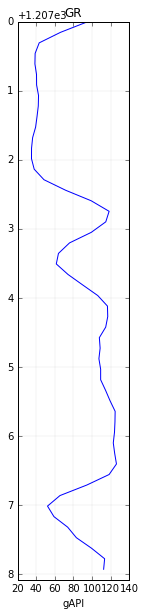

In [12]:
newb = gr.to_basis(start=1207, stop=1215)
newb.plot()

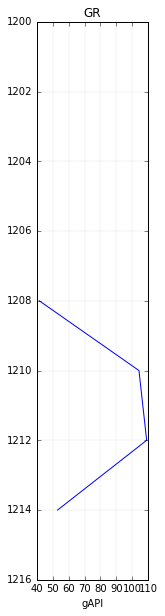

In [15]:
silly = newb.to_basis(start=1200, step=2)
silly.plot()

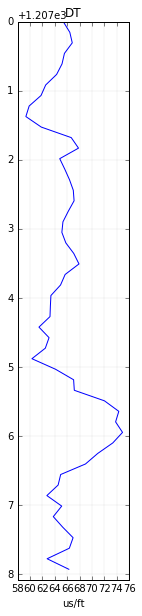

In [17]:
dt = w.data['DT']
dt.to_basis_like(newb.basis).plot()

## Getting a segment of the data

In [41]:
segment = gr.new_basis(600, 680)

In [42]:
segment.basis[-1]

679.55279999997038

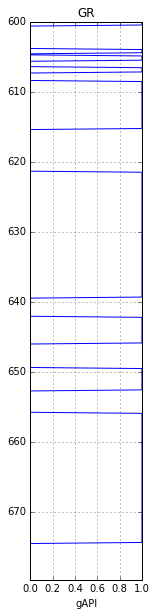

In [43]:
segment.block(cutoffs=50).plot()

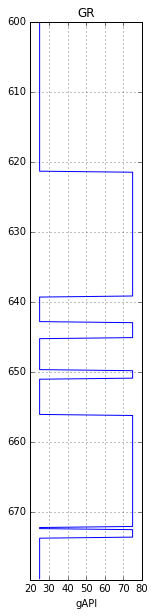

In [44]:
segment.block(values=(25, 75)).plot()

You can use a cutoff of, say, 50 API, then reassign the output values to whatever you like:

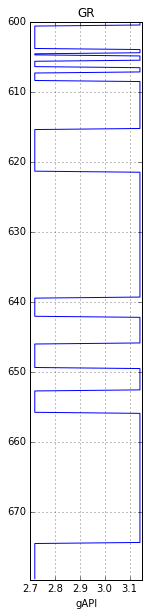

In [45]:
segment.block(cutoffs=50, values=(2.718, 3.142)).plot()

You can send a function in to determine replacement values from the original log. E.g., to replace the values with the block means:

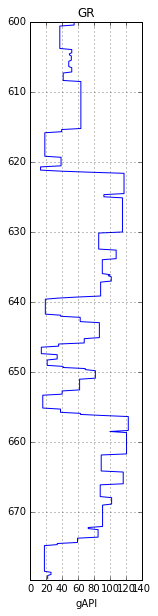

In [46]:
segment.block(cutoffs=[25, 50, 75, 100], function=np.mean).plot()

## Applying a function

In [47]:
def gardner(vp, alpha=0.31, beta=0.25):
    return alpha * vp ** beta

dt = w.data['DT']
vp = 1000000 / dt
vp.apply(gardner)

Curve([ nan,  nan,  nan, ...,  nan,  nan,  nan])

## Not implemented yet

PUT WISHED-FOR APIS HERE.